# LOGISTIC REGRESSON

## Importing The Libraries & Dataset 

In [1]:
# IMORTING THE LIBRARIES

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# IMPORTING THE DATASET

data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# CHECKING THE HEAD OF DATA

data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# CHECKING THE INFO OF DATA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
# SEPARATING THE DEPENDENT AND INDEPENDENT VARIABLES

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.reshape(-1,1)

In [6]:
# CHECKING THE INDEPENDENT VARIABLES

X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [7]:
# CHECKING THE DEPENDENT VARIABLES

y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [8]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Exploratory Data Analysis

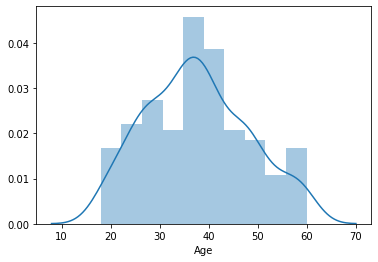

In [9]:
# CHECKING THE DISTRIBUTION OF Age

sns.distplot(data['Age'])

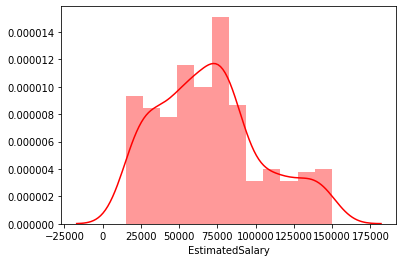

In [10]:
# CHECKING THE DISTRIBUTION OF EstimatedSalary

sns.distplot(data['EstimatedSalary'], color = 'red')

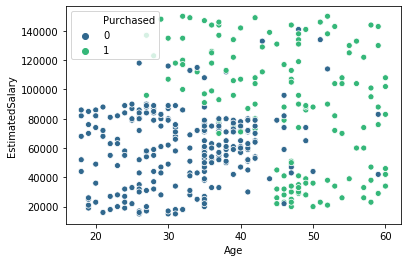

In [25]:
# CREATING THE SCATTERPLOT OF Age & EstimatedSalary

sns.scatterplot(x = 'Age', y = 'EstimatedSalary', data = data, hue = 'Purchased', palette = 'viridis')

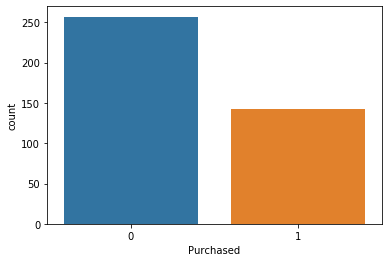

In [12]:
# CREATING A COUNTPLOT FOR PURCHASED

sns.countplot(x = 'Purchased', data = data)

## Dividing Data Into Train Test Split

In [15]:
# IMPORTING THE train_test_split

from sklearn.model_selection import train_test_split

# DIVIDING DATA INTO TRAINING AND TESTING DATA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Scaling The Data

In [16]:
# IMPORTING THE StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# SCALING THE DATA 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating, Training & Making Predictions From The Model

In [17]:
# IMPORTING THE Logistic_Regression MODEL

from sklearn.linear_model import LogisticRegression

# MAKING OBJECT OF THE LogisticRegression CLASS

classifier = LogisticRegression(random_state = 0)

In [18]:
# TRAINING THE MODEL ON TRAINING DATA

classifier.fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# MAKING PREDICTIONS ON WHOLE TEST DATA

y_pred = classifier.predict(X_test)

In [20]:
# MAKING PREDICTION ON SINGLE DATA POINT

classifier.predict(sc.transform([[30, 87000]]))

array([0], dtype=int64)

In [21]:
# RESHAPING THE PREDICTIONS

y_pred = y_pred.reshape(100,1)

In [22]:
# CONCATENATING THE PREDICTIONS AND TRUE TARGETS

np.concatenate((y_test, y_pred), axis = 1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0,

## Evaulating The Classifier

In [23]:
# IMPORTING THE METRICS FOR CLASSIFICATION THE ACCURACY, CONFUSION MATRIX, & CLASSIFICATION REPORT

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# PRINTING THE ACCURACY SCORE, CONFUSION MATRIX, & CLASSIFICATION REPORT

print("The Accuracy Score Is: ", accuracy_score(y_pred, y_test))
print("\n")
print("The Confusion Matrix Is: ","\n","\n",confusion_matrix(y_pred, y_test))
print("\n")
print("The Classification Report is: ","\n","\n",classification_report(y_pred, y_test))

The Accuracy Score Is:  0.89


The Confusion Matrix Is:  
 
 [[65  8]
 [ 3 24]]


The Classification Report is:  
 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92        73
           1       0.75      0.89      0.81        27

    accuracy                           0.89       100
   macro avg       0.85      0.89      0.87       100
weighted avg       0.90      0.89      0.89       100

